# Crash course on Machine Learning

### Supervised ML
>- Supervised learning is a machine learning approach that’s defined by its use of labeled datasets. 
>- These datasets are designed to train or “supervise” algorithms into classifying data or predicting outcomes accurately. 
>- Using labeled inputs and outputs, the model can measure its accuracy and learn over time.
>- Supervised ML can be broken into two categories: 
>>- Classification problems:
>>>- Use an algorithm to accurately assign test data into specific categories, such as separating apples from oranges. Or, in the real world, supervised learning algorithms can be used to classify spam in a separate folder from your inbox. Linear classifiers, support vector machines, decision trees and random forest are all common types of classification algorithms.
>>-Regression:
>>>- Uses an algorithm to understand the relationship between dependent and independent variables. Regression models are helpful for predicting numerical values based on different data points, such as sales revenue projections for a given business. Some popular regression algorithms are linear regression, logistic regression and polynomial regression.

### Unsupervised ML
>- Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. 
>- These algorithms discover hidden patterns in data without the need for human intervention (hence, they are “unsupervised”).
>- Unsupervised learning models are used for three main tasks: 
>>- Clustering: 
>>>- Data mining technique for grouping unlabeled data based on their similarities or differences. 
>>>- For example, K-means clustering algorithms assign similar data points into groups, where the K value represents the size of the grouping and granularity. 
>>>- This technique is helpful for market segmentation, image compression, etc.
>>- Association:
>>>- Uses different rules to find relationships between variables in a given dataset. 
>>>- These methods are frequently used for market basket analysis and recommendation engines, along the lines of “Customers Who Bought This Item Also Bought” recommendations.
>>- Dimensionality reduction:
>>>- Used when the number of features  (or dimensions) in a given dataset is too high. 
>>>- It reduces the number of data inputs to a manageable size while also preserving the data integrity. Often, this technique is used in the preprocessing data stage, such as when autoencoders remove noise from visual data to improve picture quality.

### IBM artical on the differences:
>- https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

### Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Get Sample Data

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [5]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


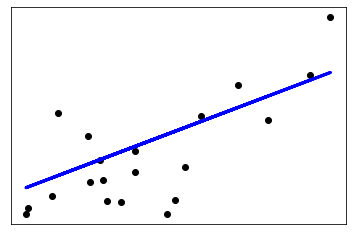

In [6]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Analyzing stock with Python

##### Import packages

In [7]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import math
import numpy as np
from sklearn import preprocessing

##### Get data

In [8]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.440720
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.746637
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.000776
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,28.029020
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.179626


##### Create 100 day rolling average series:

In [9]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2017-01-05    26.340922
2017-01-06    26.362075
2017-01-09    26.386004
2017-01-10    26.410590
2017-01-11    26.437010
Name: Adj Close, Length: 1769, dtype: float64

##### Do some plotting:

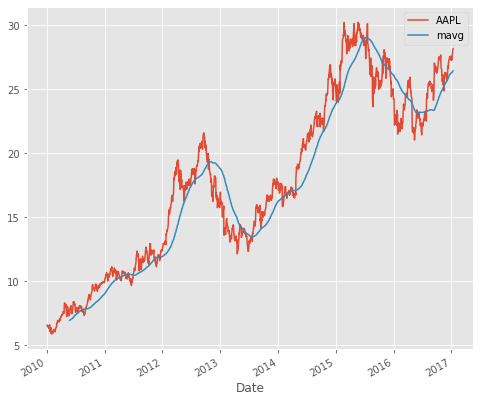

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

##### Calculate Returns:
>- r = (Price{today}-Price{yesterday})/Price{yesterday}

<AxesSubplot:xlabel='Date'>

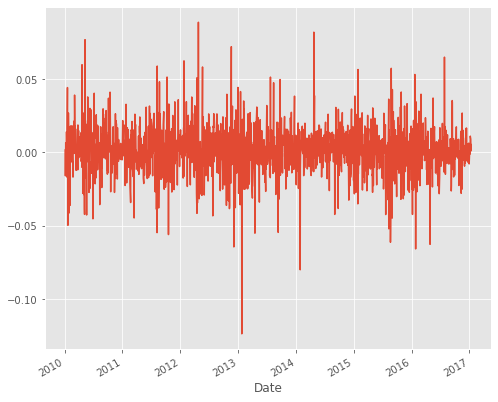

In [5]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

##### Get Apples competitors

In [6]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,27.440718,225.516129,794.020020,128.227356,57.925182
2017-01-06,27.746634,226.160080,806.150024,128.858246,58.427265
2017-01-09,28.000778,225.086868,806.650024,127.429245,58.241299
2017-01-10,28.029018,224.442902,804.789978,125.810295,58.222713
2017-01-11,28.179621,225.158401,807.909973,127.505272,58.752686


##### Look at correlation between companies:

In [7]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381501,0.411693,0.383906,0.393467
GE,0.381501,1.000000,0.422301,0.535500,0.474070
GOOG,0.411693,0.422301,1.000000,0.402875,0.472082
IBM,0.383906,0.535500,0.402875,1.000000,0.496905
MSFT,0.393467,0.474070,0.472082,0.496905,1.000000


##### Visualizing the Correlation

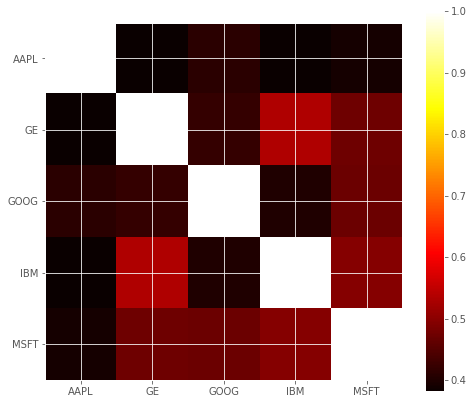

In [8]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

##### Compare Apple and GE

Text(0, 0.5, 'Returns GE')

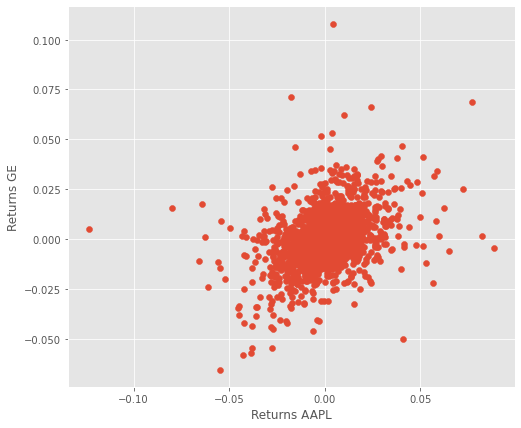

In [9]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

##### Features Engineering
>- High Low Percentage and Percentage Change

In [43]:
dfreg = df.loc[:,['Adj Close','Volume']] ## df here is our initial apple df
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,6.553026,493729600.0,0.990606,0.271752
2010-01-05,6.564355,601904800.0,1.091526,-0.102519
2010-01-06,6.459940,552160000.0,2.123529,-1.590632
2010-01-07,6.447998,477131200.0,1.400900,-0.552545
2010-01-08,6.490867,447610800.0,1.386917,0.798858
...,...,...,...,...
2017-01-05,27.440723,88774400.0,0.900440,0.595240
2017-01-06,27.746634,127007600.0,1.433299,0.967636
2017-01-09,28.000778,134247600.0,1.252204,0.881730


##### Pre-processing & Cross Validation
>- We will clean up and process the data using the following steps before putting them into the prediction models:
>>- Drop missing value
>>- Separating the label here, we want to predict the AdjClose
>>- Scale the X so that everyone can have the same distribution for linear regression
>>- Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
>>- Separate label and identify it as y
>>- Separation of training and testing of model by cross validation train test split

In [44]:
# Drop missing value
dfreg.dropna(inplace=True)
dfreg.shape

(1769, 4)

In [45]:
# We want to separate 5 percent of the data to forecast
forecast_out = int(math.ceil(0.05 * len(dfreg)))
print(forecast_out)


89


In [79]:
y_train = dfreg.iloc[:-forecast_out]['Adj Close']
y_test = dfreg.iloc[-forecast_out:]['Adj Close']

X_train = dfreg.iloc[:-forecast_out].drop('Adj Close', axis = 1)
X_test = dfreg.iloc[-forecast_out:].drop('Adj Close', axis = 1)

print(y_train.head(3))
print(y_real.head(3))
print(X_train.head(3))
print(X_test.head(3))



Date
2010-01-04    6.553026
2010-01-05    6.564355
2010-01-06    6.459940
Name: Adj Close, dtype: float64
Date
2016-09-06    25.214554
2016-09-07    25.369076
2016-09-08    24.704176
Name: Adj Close, dtype: float64
                 Volume    HL_PCT  PCT_change
Date                                         
2010-01-04  493729600.0  0.990606    0.271752
2010-01-05  601904800.0  1.091526   -0.102519
2010-01-06  552160000.0  2.123529   -1.590632
                 Volume    HL_PCT  PCT_change
Date                                         
2016-09-06  107521600.0  0.733520   -0.185361
2016-09-07  169457200.0  1.559618    0.491513
2016-09-08  212008000.0  1.923805   -1.613057


##### Multiple Linear Regression Model Generation

##### Using Stats Model:

In [87]:
import statsmodels.api as sm
from scipy import stats

In [90]:
X = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.611
Method:                 Least Squares   F-statistic:                              879.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        11:01:03   Log-Likelihood:                         -6493.8
No. Observations:                1680   AIC:                                  1.299e+04
Df Residuals:                    1677   BIC:                                  1.301e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Volume     -1.684e-10   1.29e-09     -0.130      0.896   -2.71e-09    2.37e-09
HL_PCT         6.3806      0.259     24.664      0.000       5.873       6.888
PCT_change     0.4309      0.210      2.055      0.040       0.020       0.842
==============================================================================
Omnibus:                     1114.060   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53637.193
Skew:                          -2.479   Prob(JB):                         0.00
Kurtosis:                      30.233   Cond. No.                     4.19e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Prediction:

In [91]:
# In sample prediction
ypred = model1.predict(X_train)
print(ypred)

Date
2010-01-04     6.354578
2010-01-05     6.819011
2010-01-06    12.770891
2010-01-07     8.620075
2010-01-08     9.118175
                ...    
2016-08-29     6.933189
2016-08-30     6.084107
2016-08-31     5.752230
2016-09-01     7.275858
2016-09-02     6.982779
Length: 1680, dtype: float64


In [92]:
# Out of sample prediction
ypred_out = model1.predict(X_test)
print(ypred_out)

Date
2016-09-06     4.582287
2016-09-07    10.134505
2016-09-08    11.544158
2016-09-09    15.370930
2016-09-12    20.444588
                ...    
2017-01-05     5.986862
2017-01-06     9.540833
2017-01-09     8.347112
2017-01-10     5.892264
2017-01-11     7.434517
Length: 89, dtype: float64
